In [2]:
import glob
import pandas
import seaborn
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [152]:
glob.glob('logs/a2c/*')

['logs/a2c/a2c_0.all-log',
 'logs/a2c/a2c_0.839309354318-log',
 'logs/a2c/a2c_0.8587228232556535-log',
 'logs/a2c/a2c_0.291884179427754-log',
 'logs/a2c/a2c_0.all-log_reward.csv',
 'logs/a2c/a2c_0.5333673473209196-log',
 'logs/a2c/a2c_0.all-log_losses.csv',
 'logs/a2c/a2c_0.5250580183209552-log',
 'logs/a2c/a2c_0.38985953554965636-log',
 'logs/a2c/a2c_0.8323747714184345-log',
 'logs/a2c/a2c_0.6565708838934593-log']

In [153]:
logfilename = 'a2c_0.all'
loss_filename = 'logs/a2c/'+logfilename+'-log_losses.csv'
reward_filename = 'logs/a2c/'+logfilename+'-log_reward.csv'

In [154]:
loss_df = pandas.read_csv(loss_filename,
                          names=["Iter", "PGLoss", "ValLoss", "Entropy", "ExplainedVar"],
                          dtype={"Iter": np.uint32, "PGLoss": np.float16, "ValLoss": np.float16,
                                 "Entropy": np.float16, "ExplainedVar": np.float16})

In [155]:
# def convertx(x):
#     try:
#         x = np.uint(x)
#     except:
#         print(x)
# reward_df.Time.apply(convertx)

In [156]:
reward_df = pandas.read_csv(reward_filename,
                            names=["Time", "Reward", "EpisodeLength"],
                            dtype={'Time': np.uint64, 'Reward': np.int8, 'EpisodeLength': np.uint16}
                           )

In [157]:
# reward_df = pandas.read_csv('logs/a2c-cartpole-g0.99r5n5-log_rewards.csv',
#                             header=None,
#                             names=['Iteration', 'Episode', 'Reward'])

In [158]:
# step_max=loss_df.Iter.values[-1]
# step_vals = loss_df.Iter.values

In [171]:
loss_df.tail()

,Iter,PGLoss,ValLoss,Entropy,ExplainedVar
845,9600,-0.002100,0.003201,0.250488,0.910156
846,9700,-0.009399,0.002300,0.333496,0.959961
847,9800,0.001700,0.000700,0.349121,0.990234
848,9900,0.000200,0.001600,0.407227,0.959961
849,10000,0.006599,0.000800,0.416260,0.990234


Text(0.5,1,'PGLoss')

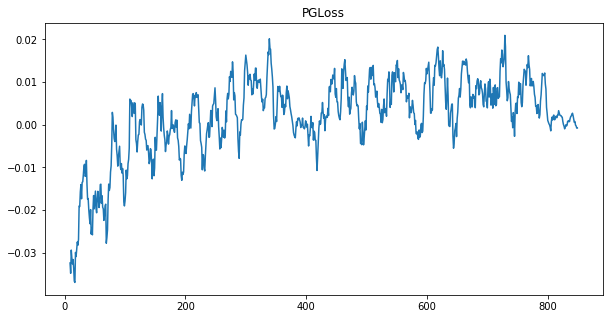

In [167]:
rolling_PGLoss = loss_df.PGLoss.rolling(10).mean()
plt.figure(figsize=(10,5))
# plt.scatter(data=loss_df[loss_df.Iter % 1 == 0], x= , y="PGLoss", s=5)
plt.plot(rolling_PGLoss)
plt.title('PGLoss')

Text(0.5,1,'ValueLoss')

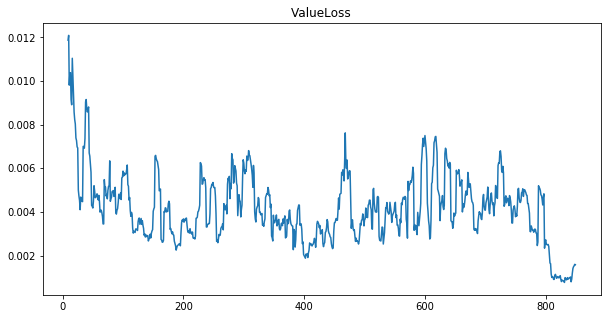

In [166]:
rolling_ValLoss = loss_df.ValLoss.rolling(10).mean()
plt.figure(figsize=(10,5))
# plt.scatter(data=loss_df[loss_df.Iter % 1 == 0], x= , y="PGLoss", s=5)
plt.plot(rolling_ValLoss)
plt.title('ValueLoss')

Text(0.5,1,'ExplainedVar')

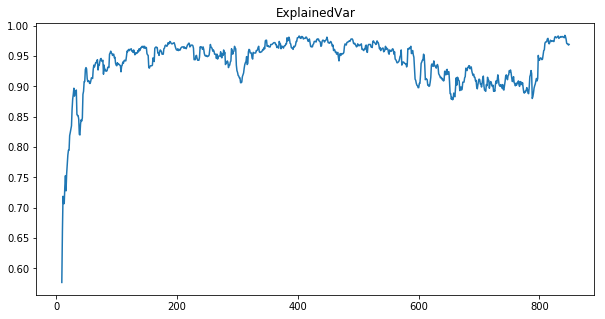

In [169]:
rolling_ExplainedVar = loss_df.ExplainedVar.rolling(10).mean()
plt.figure(figsize=(10,5))
# plt.scatter(data=loss_df[loss_df.Iter % 1 == 0], x= , y="PGLoss", s=5)
plt.plot(rolling_ExplainedVar)
plt.title('ExplainedVar')

Text(0.5,1,'ExplainedVar')

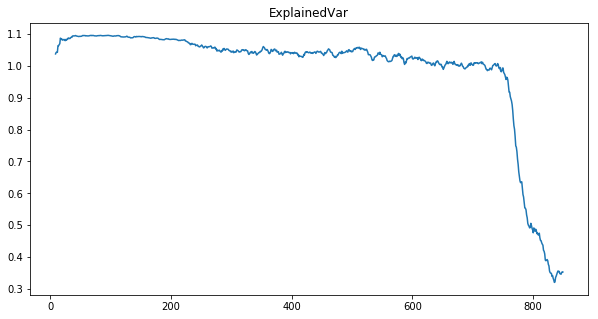

In [173]:
rolling_Entropy = loss_df.Entropy.rolling(10).mean()
plt.figure(figsize=(10,5))
# plt.scatter(data=loss_df[loss_df.Iter % 1 == 0], x= , y="PGLoss", s=5)
plt.plot(rolling_Entropy)
plt.title('ExplainedVar')

In [174]:
reward_df.head()

,Time,Reward,EpisodeLength
0,100,-21,759
1,200,-21,791
2,300,-21,759
3,400,-21,759
4,500,-21,762


In [178]:
rollingmean_rewards = reward_df.Reward.rolling(10).mean()
rollingmean_eplength = reward_df.EpisodeLength.rolling(10).mean()

Text(0.5,1,'Reward')

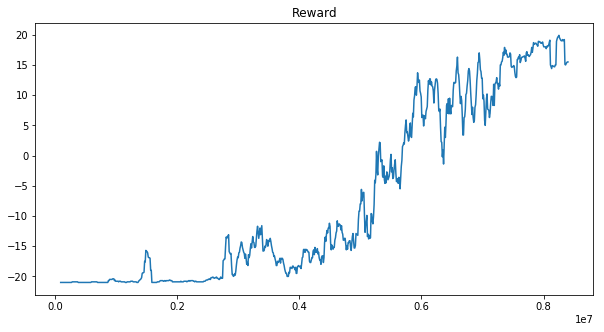

In [179]:
plt.figure(figsize=(10,5))
# plt.scatter(data=loss_df[loss_df.Iter % 1 == 0], x= , y="PGLoss", s=5)
plt.plot(np.linspace(0,8400000, len(rollingmean_rewards)), rollingmean_rewards)
plt.title('Reward')

Text(0.5,1,'EpisodeLength')

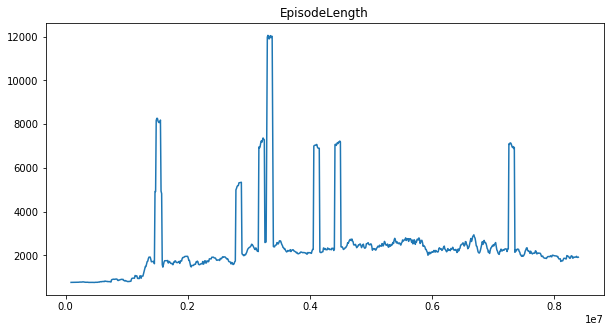

In [180]:
plt.figure(figsize=(10,5))
# plt.scatter(data=loss_df[loss_df.Iter % 1 == 0], x= , y="PGLoss", s=5)
plt.plot(np.linspace(0,8400000, len(rollingmean_eplength)), rollingmean_eplength)
plt.title('EpisodeLength')

In [151]:
reward_df.to_csv('final_rewards_a2c')